In [1]:
# Uber Fare Prediction
# Design an algorithm that will predict the fare to be charged for a passenger

# Credentials: kasham1991@gmail.com / Karan Sharma
# # Google Drive Link (1.6 GB) : https://drive.google.com/open?id=1Yp_1LWg4rtBj6ezbu6AqGRO8LpFUdYiD

In [2]:
# Importing the required libraries
import numpy as np 
import pandas as pd 

In [3]:
# Loading the dataset
# The training sheet is massive, hence calling out only 9 lakh rows
train = pd.read_csv("C:\\Datasets\\Uber_train.csv", nrows = 900000)
test = pd.read_csv("C:\\Datasets\\Uber_test.csv")

In [4]:
# Looking at the dataset
print (train.shape)
print (train.columns)
print (test.shape)
print (test.columns)

(900000, 8)
Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')
(9914, 7)
Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')


In [5]:
# Looking at the dtypes
# We need to convert pickup_datetime into date time in python
train.info()
# train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                900000 non-null  object 
 1   fare_amount        900000 non-null  float64
 2   pickup_datetime    900000 non-null  object 
 3   pickup_longitude   900000 non-null  float64
 4   pickup_latitude    900000 non-null  float64
 5   dropoff_longitude  899990 non-null  float64
 6   dropoff_latitude   899990 non-null  float64
 7   passenger_count    900000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 54.9+ MB


In [6]:
# Converting to date time format
train["pickup_datetime"] = pd.to_datetime(train['pickup_datetime'])
train.head()
# train.info()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [7]:
# Basic Statistics 
# How is minimum fare_amount negative?
# How is latitude and longitude in thousands?
# Latitude ranges from +90 to -90 while longitude ranges from -180 to +180
# We need to treat these values accordingly
train.describe()
# train.describe().T

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,900000.000000,900000.000000,900000.000000,899990.000000,899990.000000,900000.000000
mean,11.346604,-72.530192,39.931184,-72.530185,39.921118,1.684816
std,9.820414,12.175383,7.756247,11.370009,8.393865,1.307950
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992058,40.734962,-73.991390,40.734036,1.000000
50%,8.500000,-73.981797,40.752688,-73.980148,40.753162,1.000000
75%,12.500000,-73.967102,40.767133,-73.963670,40.768123,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,6.000000


In [8]:
# Checking for null values
# There are null values in longitude/latitude rows
train.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    10
dropoff_latitude     10
passenger_count       0
dtype: int64

In [9]:
# Dropping null values
train.dropna(inplace = True)
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
# Lets visualize the negative and extreme values
# Seaborn distplot shows a histogram distrubution with a line on it
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

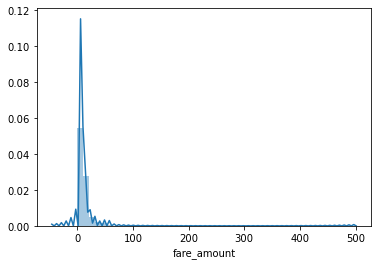

In [11]:
sns.distplot(train['fare_amount'])
# Negative fair amount

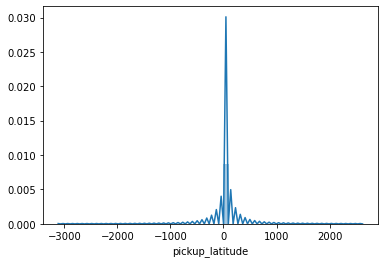

In [12]:
sns.distplot(train['pickup_latitude'])
# Greater than 1000 on either side

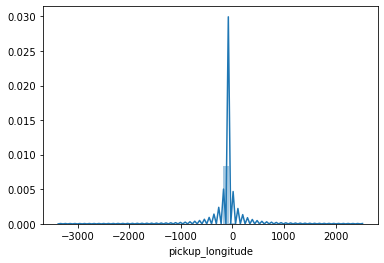

In [13]:
sns.distplot(train['pickup_longitude'])
# Greater than 1000 on either side

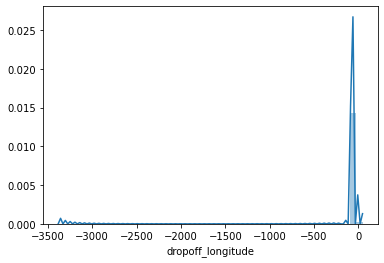

In [14]:
sns.distplot(train['dropoff_longitude'])
# Goes all the way up to negative 3000

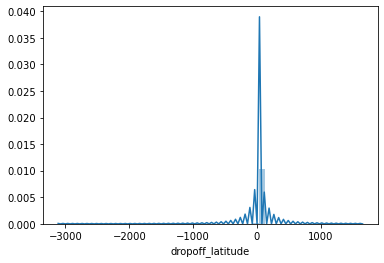

In [15]:
sns.distplot(train['dropoff_latitude'])
# This indicates to much noise in the data

In [16]:
# Looking at the range of latitude and longitude
print(test["dropoff_latitude"].min()) # drop_off latitude min
print(test["dropoff_latitude"].max()) # drop_off latitude max
print(test["dropoff_longitude"].min()) # drop_off longitude min
print(test["dropoff_longitude"].max()) # drop_off longitude max
print(test["pickup_latitude"].min()) # pickup latitude min
print(test["pickup_latitude"].max()) # pickup latitude max
print(test["pickup_longitude"].min()) # pickup longitude min
print(test["pickup_longitude"].max()) # pickup longitude max

40.568973
41.696683
-74.263242
-72.990963
40.573143
41.709555
-74.252193
-72.986532


In [17]:
# Removing all negative values in latitude and longitude
# Setting the range for noisy data 
min_longitude = -74.263242
min_latitude = 40.573143
max_longitude = -72.986532
max_latitude = 41.709555

Noise = train[(train["dropoff_latitude"]<min_latitude) | (train["pickup_latitude"]<min_latitude) | (train["dropoff_longitude"]<min_longitude) | (train["pickup_longitude"]<min_longitude) | (train["dropoff_latitude"]>max_latitude) | (train["pickup_latitude"]>max_latitude) | (train["dropoff_longitude"]>max_longitude) | (train["pickup_longitude"]>max_longitude) ]
# Noise.shape
train.drop(Noise.index, inplace = True)
train.shape

(880996, 8)

In [18]:
# Removing negative fare value
train = train[train['fare_amount']>0]
train.shape

(880941, 8)

In [19]:
# The fare price of Uber is subject to surge during high demand
# Sure occurs druing peak and rush hours
# Lets extract the different days/weeks/time/months that are subject to surge in seperate columns
# Lambda is a one time use function

import calendar
train['day'] = train['pickup_datetime'].apply(lambda x: x.day)
train['hour'] = train['pickup_datetime'].apply(lambda x: x.hour)
train['weekday'] = train['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])
train['month'] = train['pickup_datetime'].apply(lambda x: x.month)
train['year'] = train['pickup_datetime'].apply(lambda x: x.year)
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,weekday,month,year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,17,Monday,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,16,Tuesday,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,0,Thursday,8,2011
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,Saturday,4,2012
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,7,Tuesday,3,2010


In [20]:
# Coverting days of the week to numbers with the map function
train.weekday = train.weekday.map({'Sunday': 0,'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6})
# train.weekday
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880941 entries, 0 to 899999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                880941 non-null  object             
 1   fare_amount        880941 non-null  float64            
 2   pickup_datetime    880941 non-null  datetime64[ns, UTC]
 3   pickup_longitude   880941 non-null  float64            
 4   pickup_latitude    880941 non-null  float64            
 5   dropoff_longitude  880941 non-null  float64            
 6   dropoff_latitude   880941 non-null  float64            
 7   passenger_count    880941 non-null  int64              
 8   day                880941 non-null  int64              
 9   hour               880941 non-null  int64              
 10  weekday            880941 non-null  int64              
 11  month              880941 non-null  int64              
 12  year               880941 non-

In [21]:
# Removing redundant columns such as key and pickup_datetime
train.drop(["key","pickup_datetime"], axis = 1, inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880941 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        880941 non-null  float64
 1   pickup_longitude   880941 non-null  float64
 2   pickup_latitude    880941 non-null  float64
 3   dropoff_longitude  880941 non-null  float64
 4   dropoff_latitude   880941 non-null  float64
 5   passenger_count    880941 non-null  int64  
 6   day                880941 non-null  int64  
 7   hour               880941 non-null  int64  
 8   weekday            880941 non-null  int64  
 9   month              880941 non-null  int64  
 10  year               880941 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 80.7 MB


In [22]:
# Due to a very high number of floats and integers
# Lets standardize the dataset and remove NaN
# Standardization involves shifting the distribution of each data point to a mean of 0 and an SD of 1
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
h = pd.DataFrame(sc_x.fit_transform(train))
l = train.dropna(axis = 1)

In [23]:
# Splitting the Dataset
# Since we have to predict the amount of fare, this becomes our output variable 
x = l.drop("fare_amount", axis = 1)
y = l['fare_amount']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# x_train.head()
# x_test.head()
# x_train.shape
# x_test.shape

In [26]:
# Since the predicted variable is continous, linear regression will be a suitable model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [27]:
# Looking at the predicted array
y_predict = model1.predict(x_test)
y_predict

array([12.68929877,  8.81364457,  8.42580898, ..., 25.21021038,
       12.45273276, 10.805808  ])

In [28]:
# Calculating the rmse for linear Regression model
# The closer the value to 1, more the accuracy
from sklearn.metrics import mean_squared_error
model1_rmse = np.sqrt(mean_squared_error(y_predict, y_test))
print("RMSE value for Linear regression is", model1_rmse)

RMSE value for Linear regression is 8.114913216737621


In [30]:
# Trying Randomn Forest Classifier
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(n_estimators = 10, random_state = 42)
rfmodel.fit(x_train,y_train)
rfmodel_pred= rfmodel.predict(x_test)

In [31]:
rfmodel_rmse = np.sqrt(mean_squared_error(rfmodel_pred, y_test))
print("RMSE value for Random forest regression is ", rfmodel_rmse)

RMSE value for Random forest regression is  3.95179579254271


In [32]:
# RSME for Random Forest is closer to 1 
# RFC will be the preferred model
# Thank You